色ヒストグラム作成サンプル(その1)<br>
(参考サイト)<br>
http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_histograms/py_histogram_begins/py_histogram_begins.html

0 b
1 g
2 r


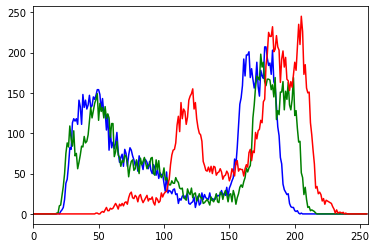

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('test.png')
color = ('b','g','r')
for i,col in enumerate(color):
    print(i, col)
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

色ヒストグラムの作成サンプル(その2)<br>
(参考サイト)<br>
https://uttnaoki.hatenablog.com/entry/2018/09/01/144923

In [ ]:
from PIL import Image
import math

# 64色のビンの生成
def rgb2bin (red, green, blue):
    redNo = int(red / 64);
    greenNo = int(green / 64);
    blueNo = int(blue / 64);
    return 16 * redNo + 4 * greenNo + blueNo;

def count_color_bins (img):
    # カラービンの配列
    color_bins = {}

    for i in range(0,64):
      color_bins.setdefault(i, 0)

    # 指定された座標のピクセルの RGB
    def increment_color_counter (x, y):
        # (x,y)の rgb を取得
        r,g,b = img.getpixel((x,y))
        # ビンの生成
        bin = rgb2bin(r,g,b)
        # 取得した rgb のカウンターをインクリメント
        color_bins[bin] += 1

    width, height = img.size
    # 画像に使われている色の数を集計し，辞書配列で img_pixel_colors に格納
    [increment_color_counter(x, y) for x in range(width) for y in range(height)]

    return color_bins

<BarContainer object of 64 artists>

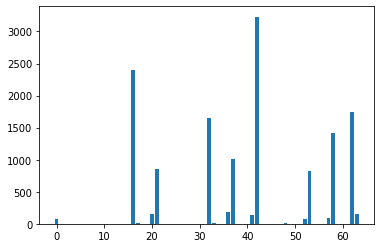

In [ ]:
img = Image.open("test.png", 'r')

# RGBに変換
rgb_img = img.convert('RGB')

# 使われている色の種類を取得し，それらのピクセル数をカウント
color_bins = count_color_bins(rgb_img)

x = []
h = []
for k, v in color_bins.items():
  x.append(k)
  h.append(v)

plt.bar(x,h)